# Import required libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# The Dataset

In [2]:
# Import the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# For images we need to scale down the pixel values from 0-255 to 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Create and summarise the model

In [3]:
model = tf.keras.models.Sequential()  # A basic feed-forward model

# Input Layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Takes our 28x28 and makes it 1x784

# Hidden Layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # A simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # 2nd hidden layer

# Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # A softmax layer with 10 output units

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Model summary
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2023-01-11 11:23:24.337958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-11 11:23:24.338301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Train the Model

In [4]:
# Train the model
model.fit(x_train, y_train, epochs=5)

# Save the model
model.save('digits.model')

Epoch 1/5


2023-01-11 11:23:24.688566: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   8/1875 [..............................] - ETA: 13s - loss: 2.2035 - accuracy: 0.3047  

2023-01-11 11:23:24.978207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.2550 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1030 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0708 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0525 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0397 - accuracy: 0.9872
INFO:tensorflow:Assets written to: digits.model/assets


# Model evaluation

In [5]:
# Load the model
model = tf.keras.models.load_model('digits.model')

# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f'Loss: {val_loss}')
print(f'Accuracy: {val_acc}')

 33/313 [==>...........................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9697

2023-01-11 11:24:15.436336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.1028 - accuracy: 0.9681
Loss: 0.10277024656534195
Accuracy: 0.9681000709533691


# Testing the model with our own handwritten digits

1/1 [==============================] - 0s 54ms/step
It is a probably a: 9


2023-01-11 11:24:17.108239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


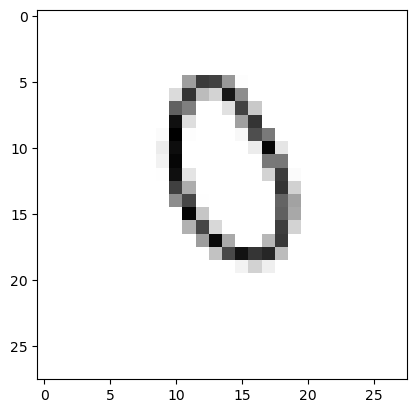

1/1 [==============================] - 0s 11ms/step
It is a probably a: 1


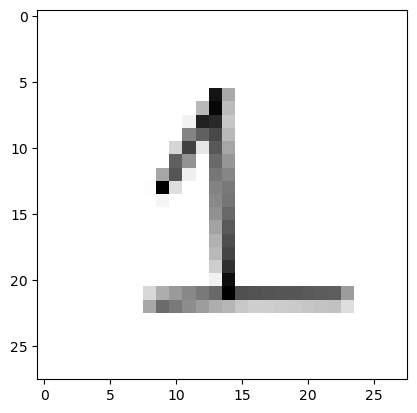

1/1 [==============================] - 0s 12ms/step
It is a probably a: 2


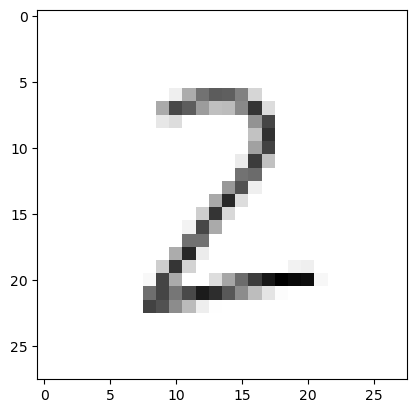

1/1 [==============================] - 0s 9ms/step
It is a probably a: 3


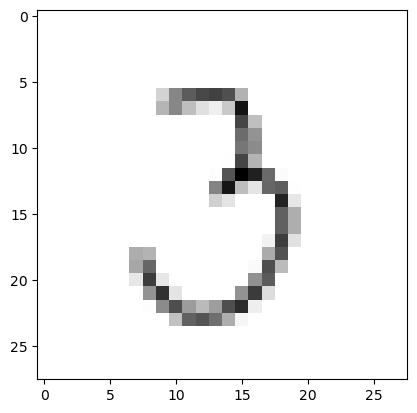

1/1 [==============================] - 0s 10ms/step
It is a probably a: 9


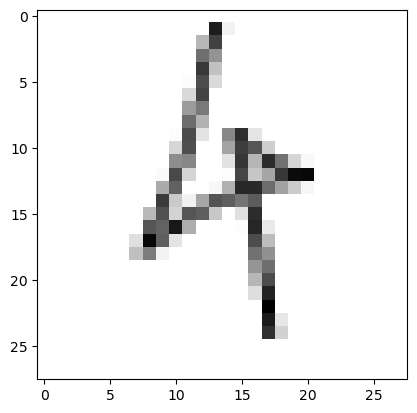

1/1 [==============================] - 0s 10ms/step
It is a probably a: 5


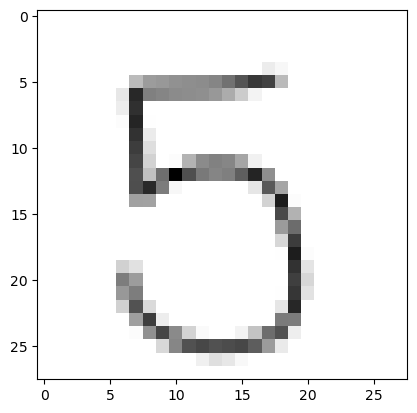

1/1 [==============================] - 0s 12ms/step
It is a probably a: 6


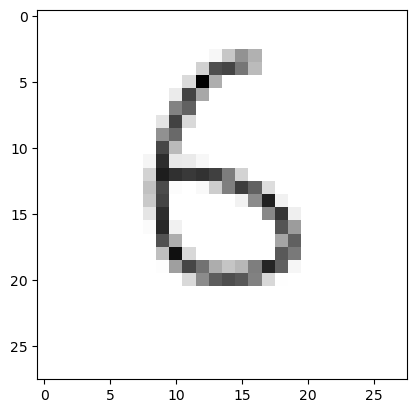

1/1 [==============================] - 0s 11ms/step
It is a probably a: 1


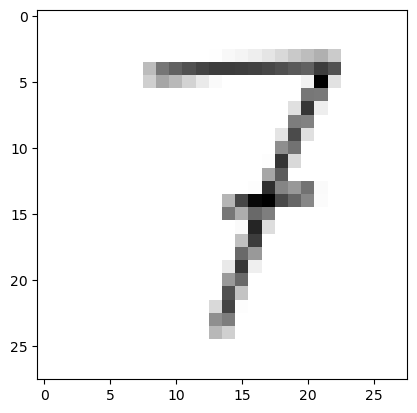

1/1 [==============================] - 0s 11ms/step
It is a probably a: 3


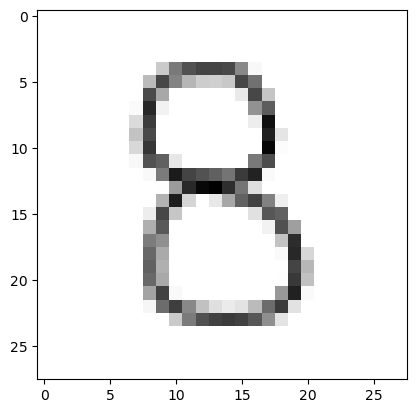

1/1 [==============================] - 0s 11ms/step
It is a probably a: 9


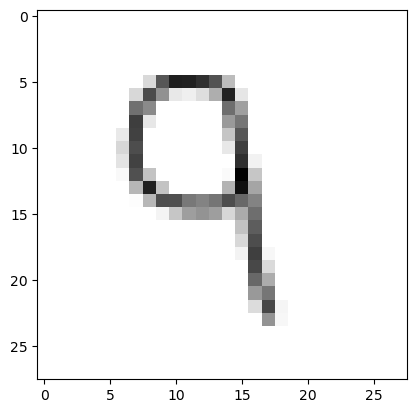

In [6]:
img_num = 0
while os.path.isfile(f"data/{img_num}.png"):
    try:
        img = cv.imread(f"data/{img_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"It is a probably a: {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print("e")

    finally:
        img_num += 1